# Science Plots Tutorial

**Author:** Sergio A. Dorado-Rojas ([sergio.dorado@daad-alumni.de](mailto:sergio.dorado@daad-alumni.de)).

---

This tutorial presents two simple examples to automatically format plots generated with `matplotlib` into IEEE format using the library `SciencePlots`.

The dependencies for working with `SciencePlots` are imported in the next cell. It is recommended to install them in a separate Python environment to avoid conflicts with other libraries.

```python
pip install numpy pandas matplotlib SciencePlots
```

**Remark:** `pandas` is not needed for this tutorial. However, its installation is highly recommended because it is a widely used library to load data in formats such as `*.csv`, `*.xlsx`, and `*.mat`, among others.

In [43]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import scienceplots


# Simple Plot

The first example corresponds to a simple plot of a time series data. The data is randomly generated. The plotting code starts at line 13. 

- It is _highly_ recommended to construct the plot within a temporary environment (i.e., the `with` statement in line 15). This helps prevent export errors and conflicts.
- Multiple styles can be combined. The pair `ieee` and `science` has been shown to give good results for IEEE publications (conference and journals).
- $\LaTeX$ is automatically rendered in title, label, and legend strings by using the `r` flag before the string (i.e., `r"$x + y$"`).
- The figure is saved in line 25. The export format is `*.png`, but any `matplotlib` export format can be used. Also, transparency is forced, and the dpi is set to 250.

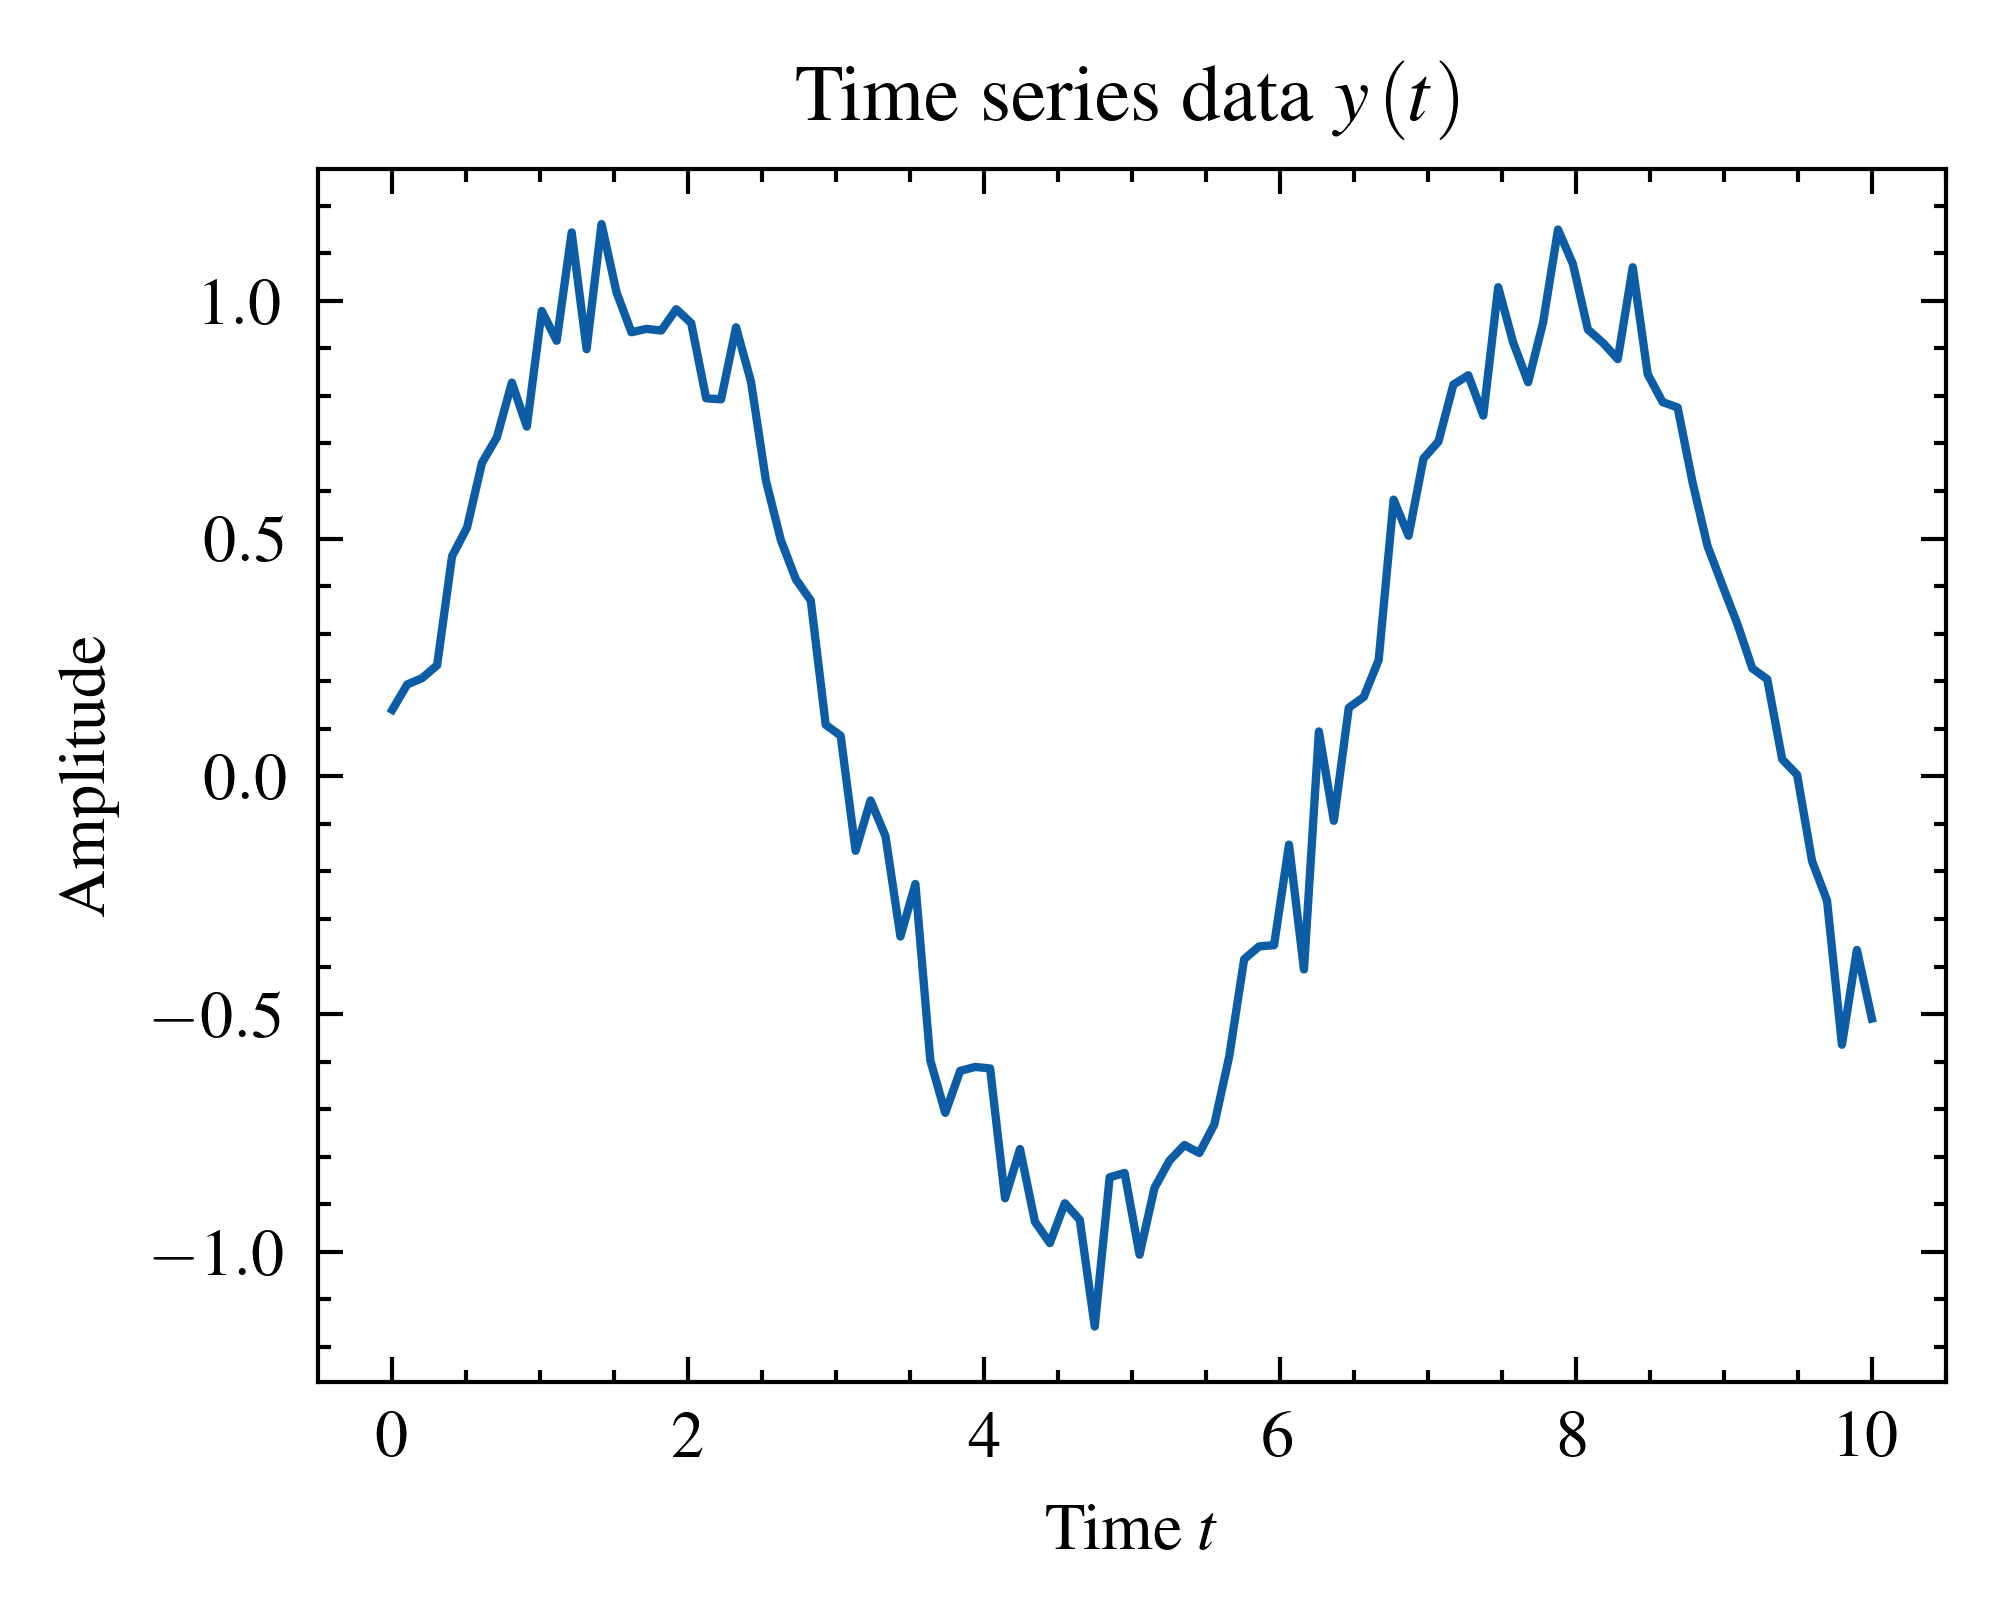

In [44]:
# -----------------------------------------------------
# Synthetic time series data
# -----------------------------------------------------
# Time
time = np.linspace(0, 10, 100)  
# Example data with noise
data = np.sin(time) + np.random.normal(0, 0.1, 100)

# -----------------------------------------------------
# Plotting data
# -----------------------------------------------------
# Change the font to 'Times New Roman' if your OS is Windows.
plt.rcParams['font.family'] = 'Times'

with plt.style.context(['ieee', 'science']):
    
    # The semi-colon suppresses rendering an empty figure.
    fig, ax = plt.subplots()

    # Plotting data.
    ax.plot(time, data)

    # Title and axis labels.
    ax.set_title(r"Time series data $y\left(t \right)$")
    ax.set_xlabel("Time $t$")
    ax.set_ylabel("Amplitude")
    
    # Saving the plot.
    fig.savefig("figs/fig_simple-plot.png", transparent=True, dpi=250)

# Visualizing the plot.
plt.show()

# Twin Plot

A twin plot has two different y-axis on the same scale. This is useful in situations where the data to be plotted have different units and/or order of magnitude.

The main differences with the code for the single plot are as follows:

- In line 29, a new axis as a `twinx()` object of the original axis is instantiated. Both axes share the same x-axis.
- The plot for the second plot is commanded in lines 32 and 33.
- Lines 36 and 37 customize the colors of the second axis.

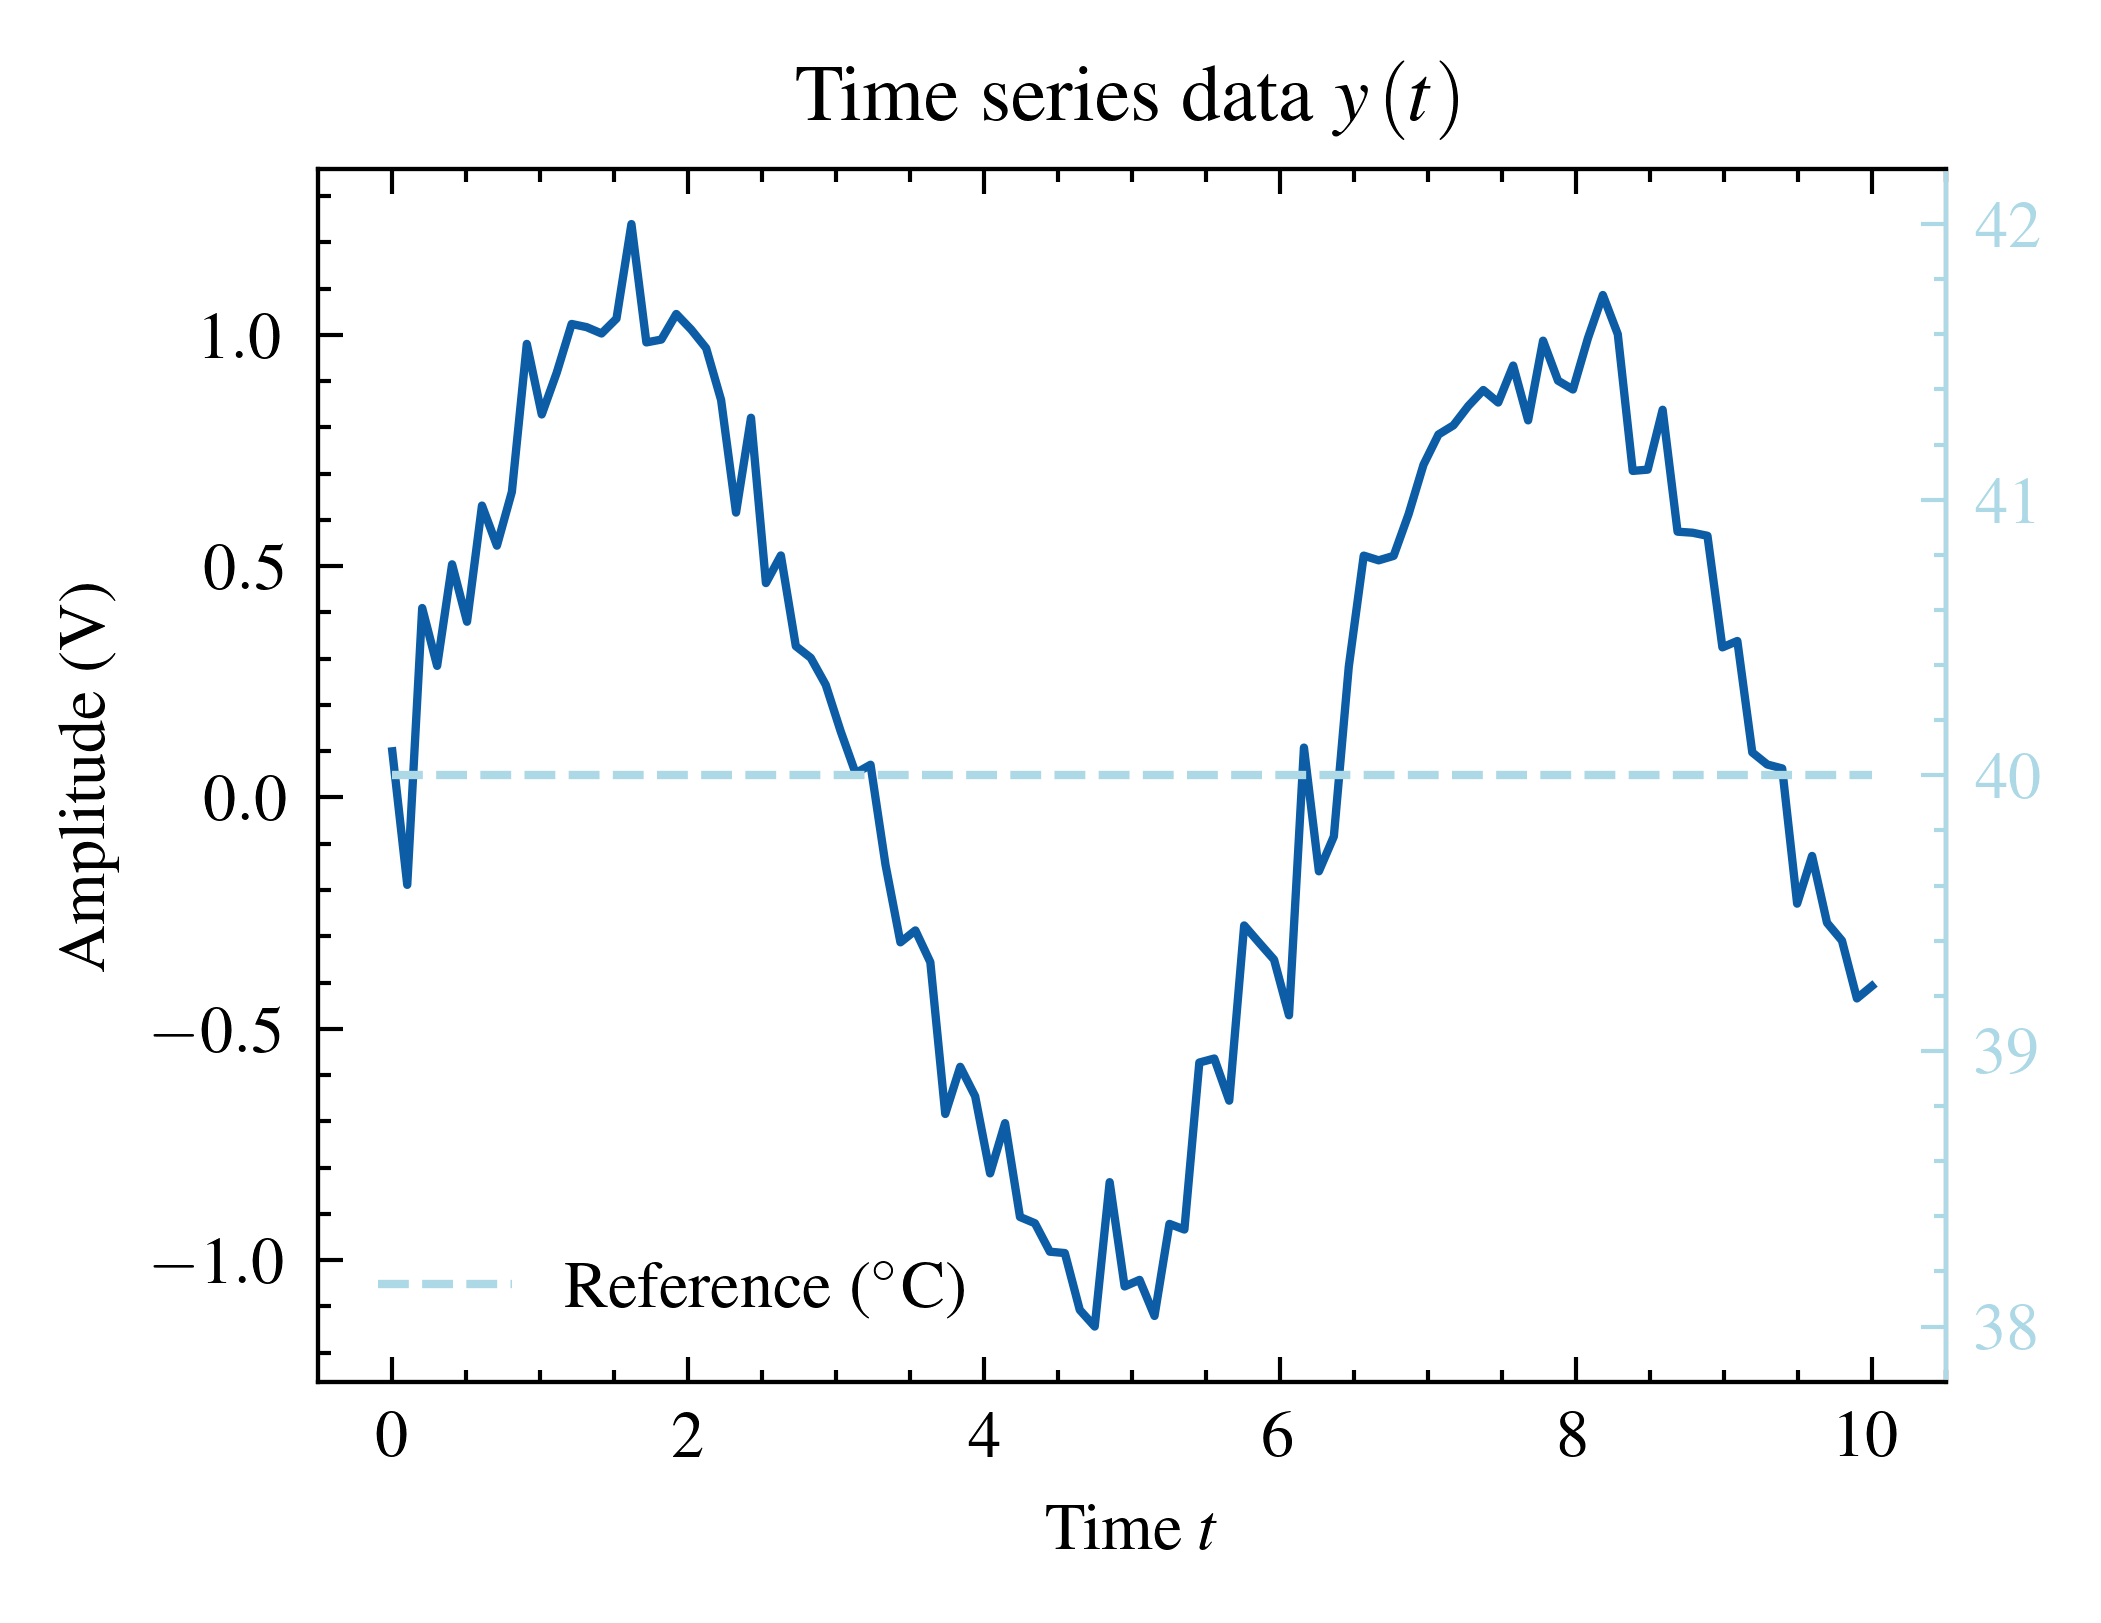

In [45]:
# -----------------------------------------------------
# Synthetic time series data
# -----------------------------------------------------
# Time
time = np.linspace(0, 10, 100)  
# Example data with noise
data = np.sin(time) + np.random.normal(0, 0.1, 100)

# -----------------------------------------------------
# Plotting data
# -----------------------------------------------------
# Change the font to 'Times New Roman' if your OS is Windows.
plt.rcParams['font.family'] = 'Times'

with plt.style.context(['ieee', 'science']):

    # The semi-colon suppresses rendering an empty figure.
    fig, ax = plt.subplots();

    # Plotting data.
    ax.plot(time, data, label="Experiment 1")

    # Title and axis labels.
    ax.set_title(r"Time series data $y\left(t \right)$")
    ax.set_xlabel("Time $t$")
    ax.set_ylabel("Amplitude (V)")

    # Creating twin axis.
    ax2 = ax.twinx()

    # Plotting data on twin axis (sharing x axis).
    ax2.plot(time, 40*np.ones_like(data), label="Reference ($^{\circ}$C)", color="lightblue", linestyle="--")
    ax2.legend(loc='lower left')

    # Changing the colors of the y-axis in the second plot.
    ax2.spines['right'].set_color("lightblue")
    ax2.tick_params(axis='y', color="lightblue", labelcolor="lightblue", which='both')
    
    # Saving the plot.
    fig.savefig("figs/fig_twin-plot.png", transparent=True, dpi=250)

# Visualizing the plot.
plt.show()

# Box and Bar Plots

Any plot that can be created with `matplotlib` can be customized to use the styles available in `SciencePlots`. The last two examples show how to customize a box and a bar plots.

## Box Plot

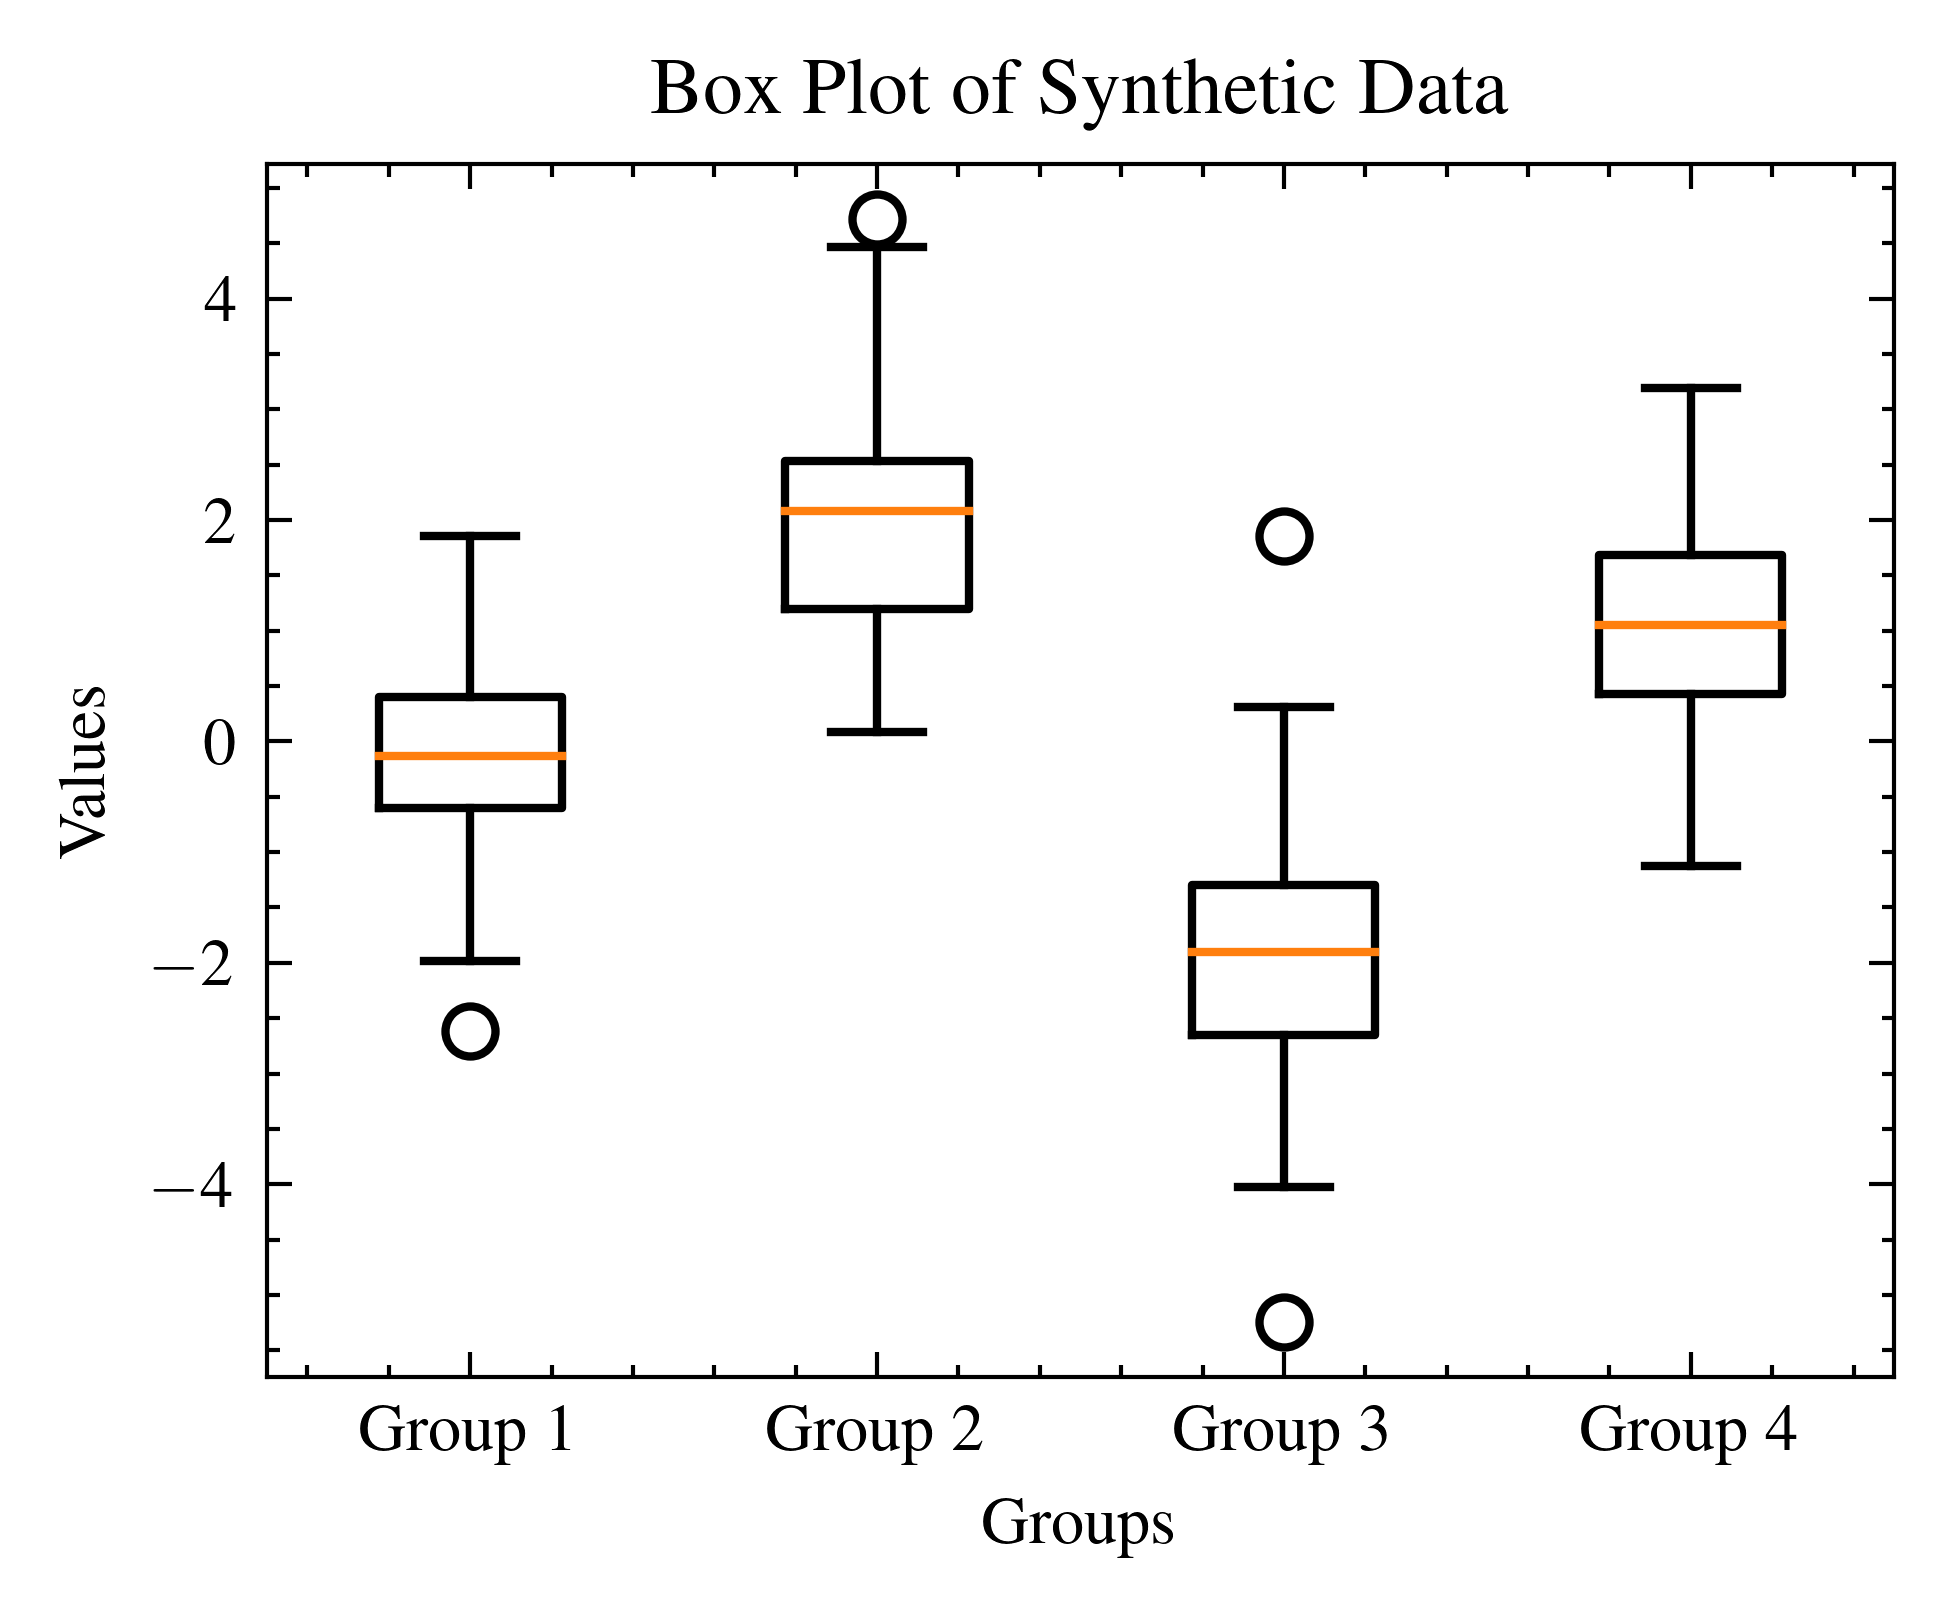

In [46]:
# Synthetic data for the box plots.
np.random.seed(42)
data = [np.random.normal(0, 1, 100),
        np.random.normal(2, 1, 100),
        np.random.normal(-2, 1, 100),
        np.random.normal(1, 1, 100)]

# Data labels.
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4']

# Plotting code.
with plt.style.context(['ieee', 'science']):
    
    # The semi-colon suppresses rendering an empty figure.
    fig, ax = plt.subplots();
    
    # Constructing box plot.
    ax.boxplot(data, labels=labels)
    ax.set_title('Box Plot of Synthetic Data')
    ax.set_xlabel('Groups')
    ax.set_ylabel('Values')

    # Saving figure.
    fig.savefig("figs/fig_box-plot.png", transparent=True, dpi=250)

plt.show()

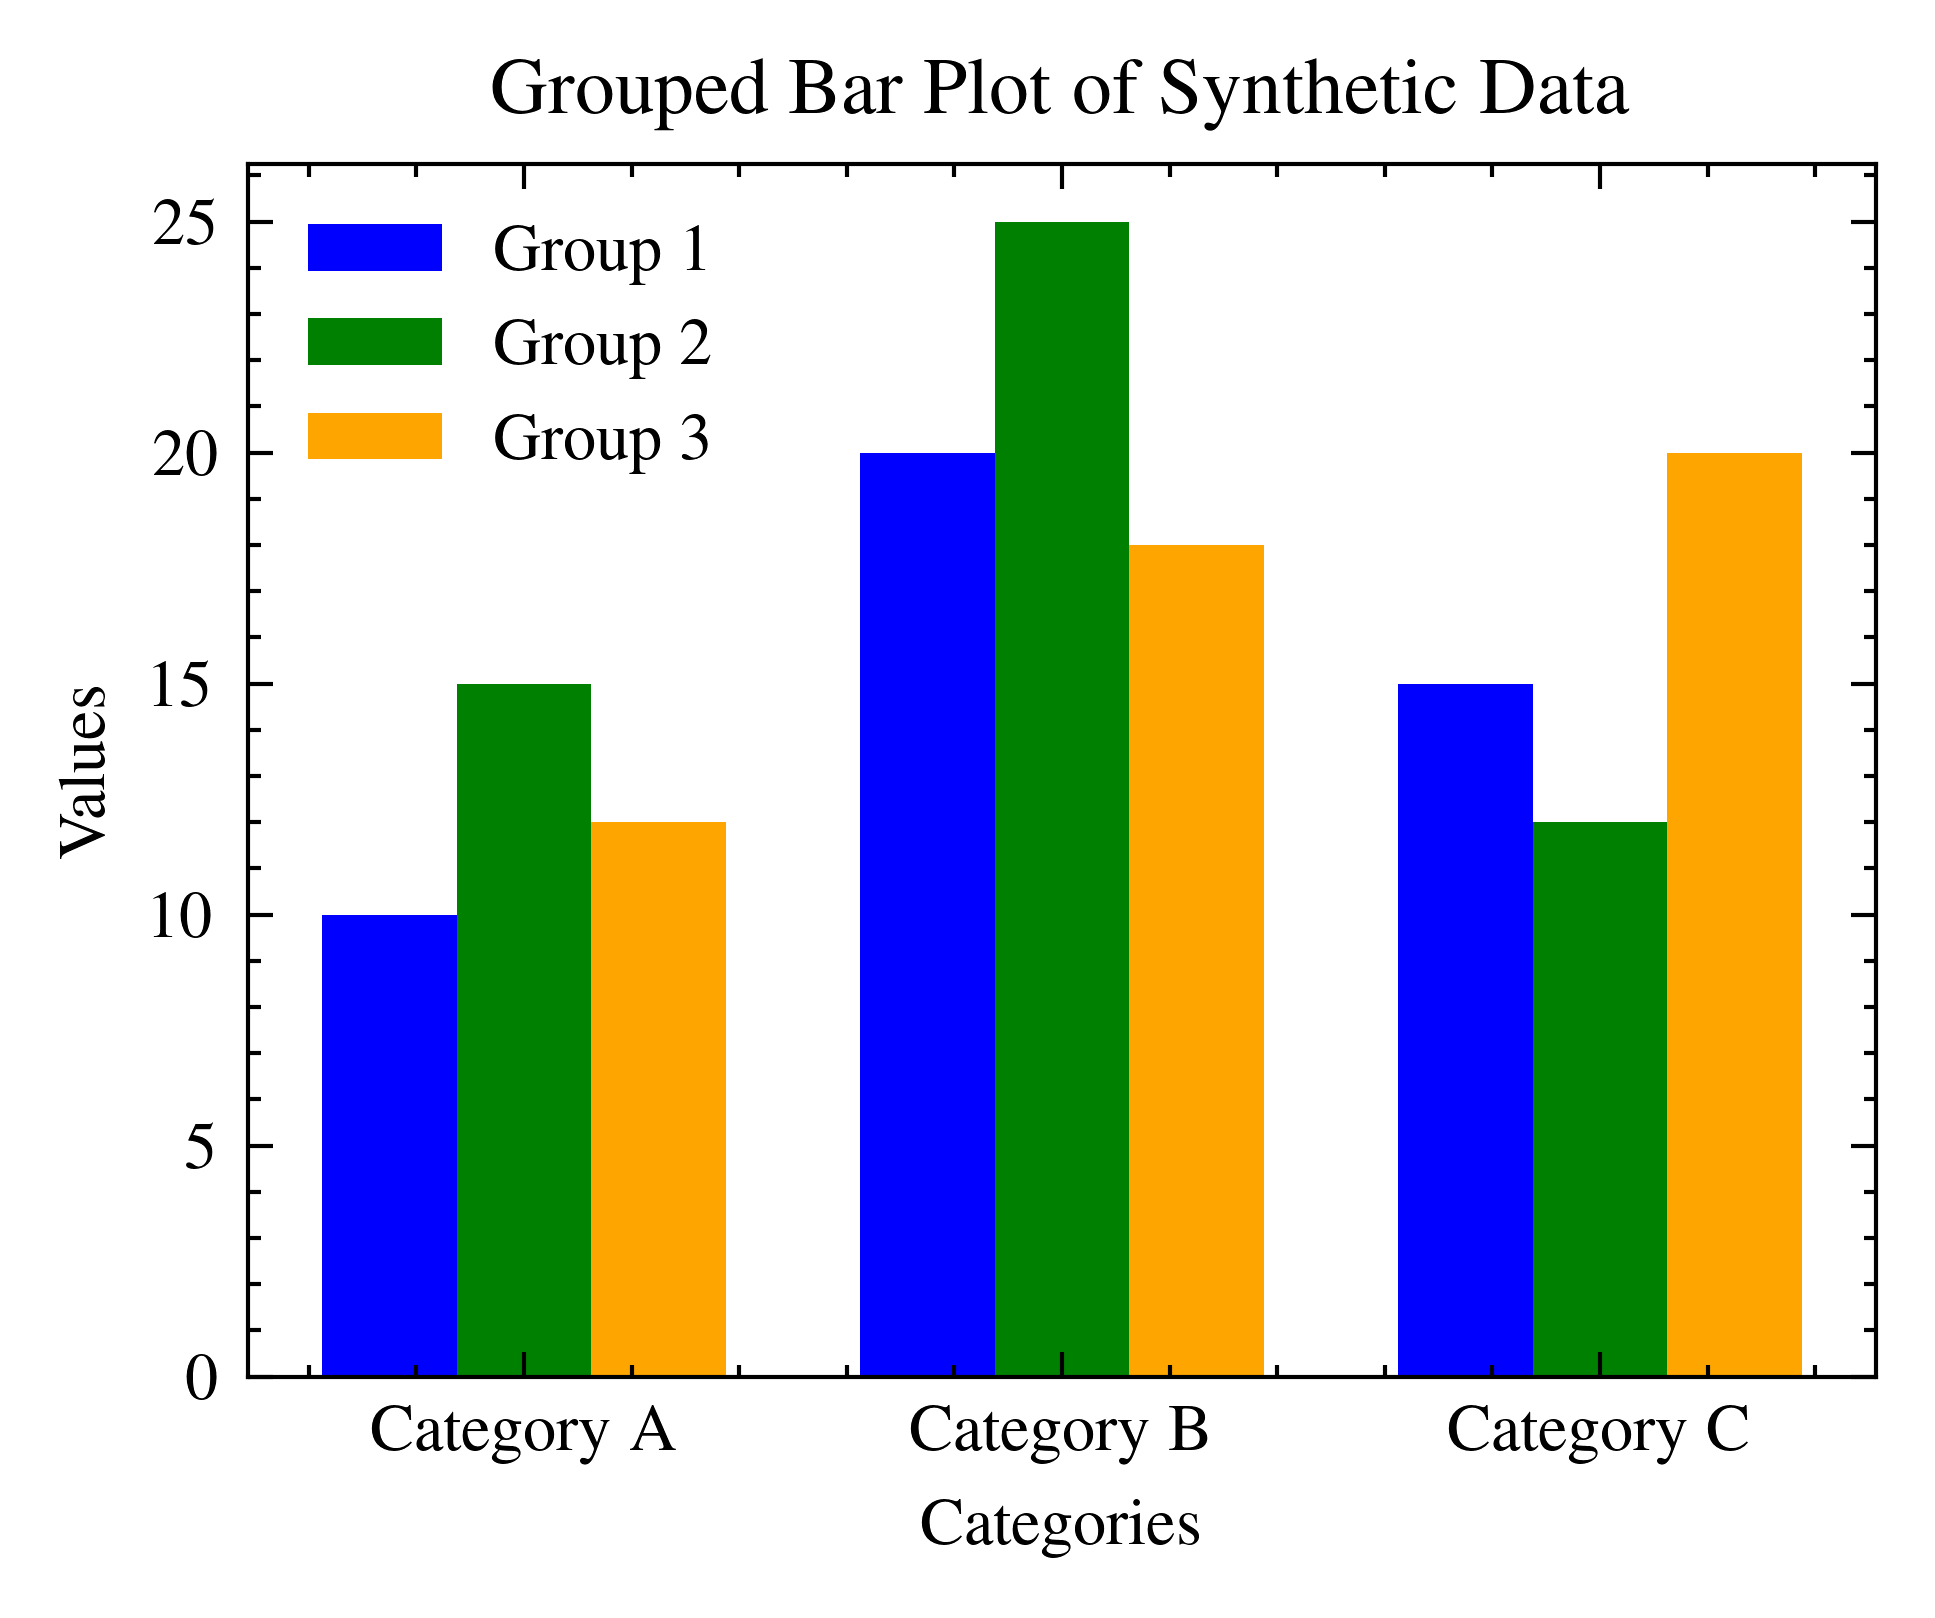

In [47]:
# Synthetic data for bar plot illustration.
categories = ['Category A', 'Category B', 'Category C']
# Data for each group.
data_mean1 = [10, 20, 15]
data_mean2 = [15, 25, 12]
data_mean3 = [12, 18, 20]

# Width of each bar.
width = 0.25  

# Number of groups.
x = np.arange(len(categories))  # x locations for the groups

with plt.style.context(['ieee', 'science']):
    
    # The semi-colon suppresses rendering an empty figure.
    fig, ax = plt.subplots();

    # Bar for each group.
    ax.bar(x - width, data_mean1, width, label='Group 1', color='blue')
    ax.bar(x, data_mean2, width, label='Group 2', color='green')
    ax.bar(x + width, data_mean3, width, label='Group 3', color='orange')

    # Adding title and axis labels.
    ax.set_xlabel('Categories')
    ax.set_ylabel('Values')
    ax.set_title('Grouped Bar Plot of Synthetic Data')

    # Setting x-axis ticks.
    ax.set_xticks(x, categories)
    
    # Adding legends.
    ax.legend()

    # Saving figure.
    fig.savefig("figs/fig_bar-plot.png", transparent=True, dpi=250)

plt.show()